<a href="https://colab.research.google.com/github/kashafali8/Deep_Reinforcement_Learning_A2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIPI 590: Deep Reinforecement Learning**
### *Kashaf Ali*

### Question 2: Implement DQN and double DQN and compare the performance of both

### Set up 

Installation

*   Use Master Version of SB3

In [1]:
%%capture
!apt-get install ffmpeg freeglut3-dev xvfb  # For visualization
!pip install stable-baselines3[extra] pyglet==1.5.27


*  Import DQN and Evaluation Helper



In [2]:
import gym
import numpy as np
import torch as th
import matplotlib.pyplot as plt

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

### **Part 1: Training Vanilla DQN**

*   use default enable_double_dqn value = False

**Step 1:** Create the Environments (Training & Evaluation)

In [3]:
## Training environment of Cartpole
train_env = gym.make('MountainCar-v0')

## Evalutation environment of Cartpole
evaluation_env = gym.make('MountainCar-v0')

In [4]:
tensorboard_log = "data/tb/"

**Step 2:** Evaluate the Agent before Training

In [5]:
dqn_vanilla = DQN("MlpPolicy",
              train_env,
              verbose=1,
              train_freq=16,
              gradient_steps=8,
              gamma=0.99,
              exploration_fraction=0.2,
              exploration_final_eps=0.07,
              target_update_interval=600,
              learning_starts=1000,
              buffer_size=10000,
              batch_size=128,
              learning_rate=4e-3,
              policy_kwargs=dict(net_arch=[256, 256]),
              tensorboard_log=tensorboard_log,
              seed=2)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
mean_reward, std_reward = evaluate_policy(dqn_vanilla, evaluation_env, deterministic=True, n_eval_episodes=100)

print(f"Mean Reward for Vanilla DQN:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean Reward for Vanilla DQN:-200.00 +/- 0.00


In [ ]:
# Optional: Monitor training in tensorboard
# %load_ext tensorboard
# %tensorboard --logdir $tensorboard_log

**Step 3:** Train the agent until convergence and then analyse the learned q-value function.

In [7]:
dqn_vanilla.learn(int(1.2e5), log_interval=10)

Logging to data/tb/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 374      |
|    time_elapsed     | 5        |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 1.99e-05 |
|    n_updates        | 496      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.845    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 383      |
|    time_elapsed     | 10       |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 2.82e-

**Step 4:** Evaluate after training, the mean episodic reward should have improved.

In [8]:
mean_reward, std_reward = evaluate_policy(dqn_vanilla, evaluation_env, deterministic=True, n_eval_episodes=20)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:-103.05 +/- 9.58


Mean episodic reward has improved from -200 to -103.05

**Step 5:** Video Recording

In [9]:
# Set up fake display; otherwise rendering will fail
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'

In [10]:
import base64
from pathlib import Path

from IPython import display as ipythondisplay


def show_videos(video_path='', prefix=''):
  """
  Taken from https://github.com/eleurent/highway-env

  :param video_path: (str) Path to the folder containing videos
  :param prefix: (str) Filter the video, showing only the only starting with this prefix
  """
  html = []
  for mp4 in Path(video_path).glob("{}*.mp4".format(prefix)):
      video_b64 = base64.b64encode(mp4.read_bytes())
      html.append('''<video alt="{}" autoplay 
                    loop controls style="height: 400px;">
                    <source src="data:video/mp4;base64,{}" type="video/mp4" />
                </video>'''.format(mp4, video_b64.decode('ascii')))
  ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))

In [11]:
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv


def record_video(env_id, model, video_length=500, prefix='', video_folder='videos/'):
  """
  :param env_id: (str)
  :param model: (RL model)
  :param video_length: (int)
  :param prefix: (str)
  :param video_folder: (str)
  """
  eval_env = DummyVecEnv([lambda: gym.make(env_id)])
  # Start the video at step=0 and record 500 steps
  eval_env = VecVideoRecorder(eval_env, video_folder=video_folder,
                              record_video_trigger=lambda step: step == 0, video_length=video_length,
                              name_prefix=prefix)

  obs = eval_env.reset()
  for _ in range(video_length):
    action, _ = model.predict(obs, deterministic=False)
    obs, _, _, _ = eval_env.step(action)

  # Close the video recorder
  eval_env.close()

Step 6: Visualize trained agent

In [12]:
record_video('MountainCar-v0', dqn_vanilla, video_length=500, prefix='dqn-mountaincar')

Saving video to /content/videos/dqn-mountaincar-step-0-to-step-500.mp4


In [13]:
show_videos('videos', prefix='dqn')

**Step 7:** Visualize Q-values

**Exercise (5 minutes): Retrieve q-values**

The function will be used to retrieve the learned q-values for a given state (`observation` in the code).

The q-network from SB3 DQN can be accessed via `model.q_net` and is a PyTorch module (you can therefore call `.forward()` on it).

You need to convert the observation to a PyTorch tensor and then convert the resulting q-values to numpy array.

Note: It is recommended to use `with th.no_grad():` context to save computation and memory

In [14]:
def get_q_values(model: DQN, obs: np.ndarray) -> np.ndarray:
    """
    Retrieve Q-values for a given observation.

    :param model: a DQN model
    :param obs: a single observation
    :return: the associated q-values for the given observation
    """
    assert model.get_env().observation_space.contains(obs), f"Invalid observation of shape {obs.shape}: {obs}"
    ### YOUR CODE HERE
    
    # Retrieve q-values for the given observation and convert them to numpy
    with th.no_grad():
      ## Create a tensor of the observation numpy array
      obs_tensor = th.from_numpy(obs).unsqueeze(0)

      ## Pass the observation through the Q network to fetch the Q Values
      q_values = dqn_vanilla.q_net(obs_tensor)
      
      ## Convert Q values tensor to numpy array
      q_values = q_values.squeeze().numpy()
    
    ### END OF YOUR CODE
    assert isinstance(q_values, np.ndarray), "The returned q_values is not a numpy array"
    assert q_values.shape == (3,), f"Wrong shape: (3,) was expected but got {q_values.shape}"

    return q_values

Q-values for the initial state:

* Let's reset the environment to start a new episode:


In [15]:
obs = train_env.reset()

* we plot the rendered environment to visualize it

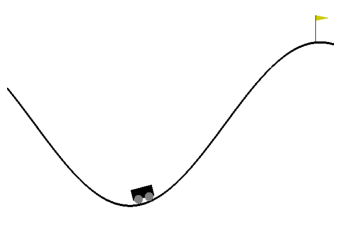

In [16]:
plt.axis('off')
plt.imshow(train_env.render(mode="rgb_array"))

**Exercise (5 minutes)- predict taken action according to q-values**

Using the `get_q_values()` function, retrieve the q-values for the initial observation, print them for each action ("left", "nothing", "right") and print the action that the greedy (deterministic) policy would follow (i.e., the action with the highest q-value for that state).

In [17]:
action_str = ["Left", "Nothing", "Right"]  # action=0 -> go left, action=1 -> do nothing, action=2 -> go right

In [18]:
### YOUR CODE HERE
# Retrieve q-values for the initial state
# You should use `get_q_values()`

## Getting the Q values using our function
q_values = get_q_values(dqn_vanilla, obs)

## Unwrapping the Q values
q_value_left, q_value_nothing, q_value_right = q_values

### END OF YOUR CODE

print(f"Q-value of the initial state left={q_value_left:.2f} nothing={q_value_nothing:.2f} right={q_value_right:.2f}")

### YOUR CODE HERE
# Compute the action taken in the initilal state according to q-values 
# when following a greedy strategy

action = np.argmax(q_values)

## END of your code here

print(f"Action taken by the greedy policy in the initial state: {action_str[action]}")

Q-value of the initial state left=-60.82 nothing=-61.11 right=-60.94
Action taken by the greedy policy in the initial state: Left


The q-value of the initial state corresponds to how much (discounted) reward the agent expects to get in this episode.

We will compare the estimated q-value to the discounted return of the episode.

In [19]:
initial_q_value = q_values.max()

**Step 8:** Step until the end of the episode


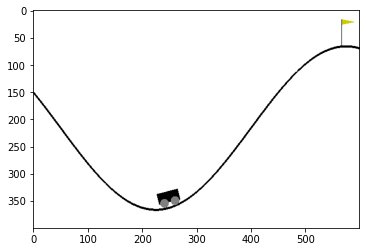

Q-value of the current state left=-60.82 nothing=-61.11 right=-60.94
Action: Left


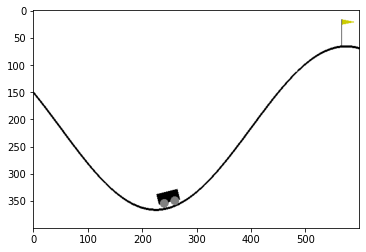

Q-value of the current state left=-60.08 nothing=-60.37 right=-60.31
Action: Left


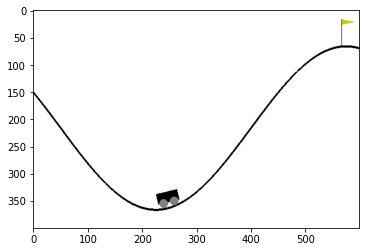

Q-value of the current state left=-59.69 nothing=-59.97 right=-59.99
Action: Left


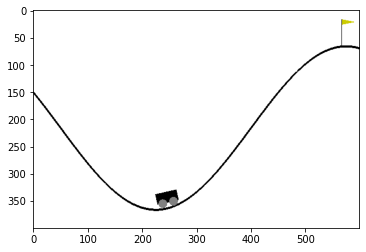

Q-value of the current state left=-60.16 nothing=-60.59 right=-60.57
Action: Left


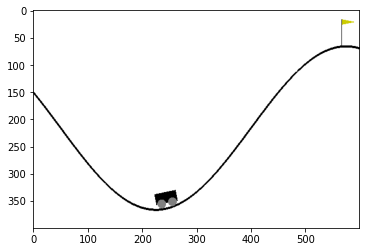

Q-value of the current state left=-60.89 nothing=-61.44 right=-61.37
Action: Left


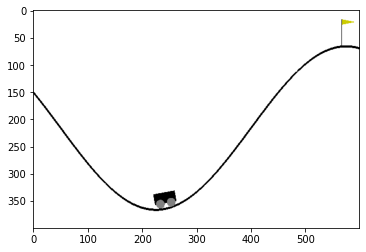

Q-value of the current state left=-61.40 nothing=-62.04 right=-61.94
Action: Left


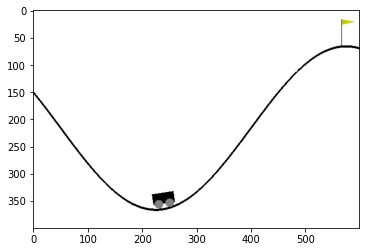

Q-value of the current state left=-61.10 nothing=-61.81 right=-61.75
Action: Left


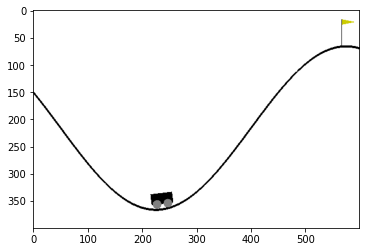

Q-value of the current state left=-60.25 nothing=-61.06 right=-61.12
Action: Left


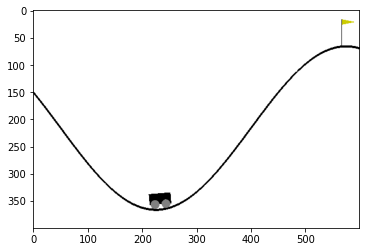

Q-value of the current state left=-59.36 nothing=-60.56 right=-61.13
Action: Left


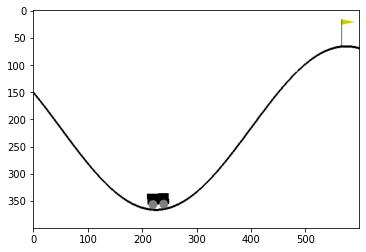

Q-value of the current state left=-57.34 nothing=-58.56 right=-59.58
Action: Left


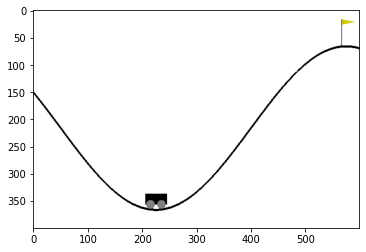

Q-value of the current state left=-56.58 nothing=-57.81 right=-59.25
Action: Left


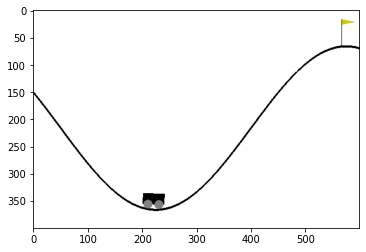

Q-value of the current state left=-56.37 nothing=-57.69 right=-59.28
Action: Left


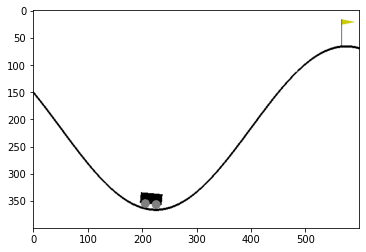

Q-value of the current state left=-55.47 nothing=-56.79 right=-58.34
Action: Left


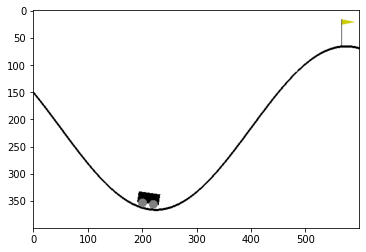

Q-value of the current state left=-54.83 nothing=-56.24 right=-57.80
Action: Left


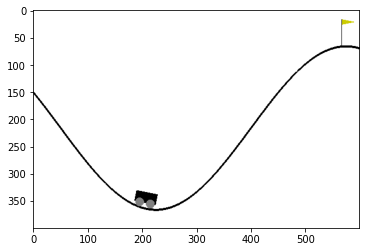

Q-value of the current state left=-53.85 nothing=-55.29 right=-56.81
Action: Left


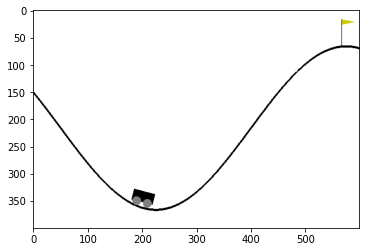

Q-value of the current state left=-53.11 nothing=-54.63 right=-56.15
Action: Left


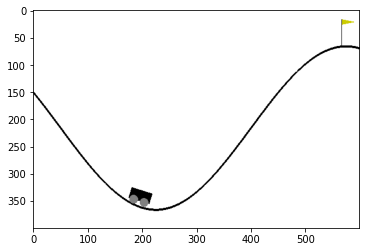

Q-value of the current state left=-52.60 nothing=-54.23 right=-55.75
Action: Left


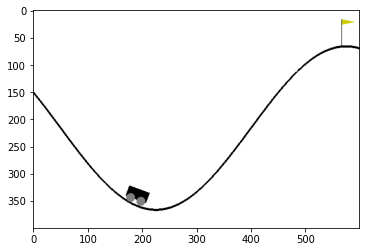

Q-value of the current state left=-51.85 nothing=-53.46 right=-54.86
Action: Left


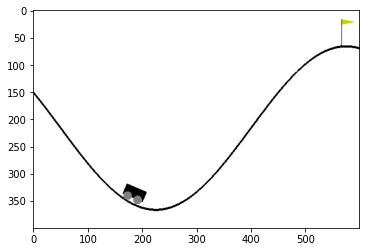

Q-value of the current state left=-50.78 nothing=-52.32 right=-53.71
Action: Left


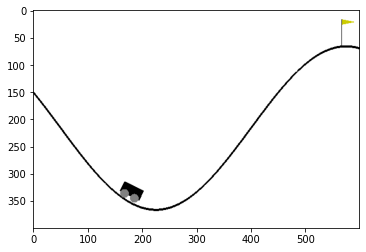

Q-value of the current state left=-49.97 nothing=-51.45 right=-52.79
Action: Left


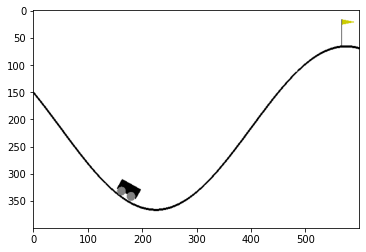

Q-value of the current state left=-49.32 nothing=-50.76 right=-52.06
Action: Left


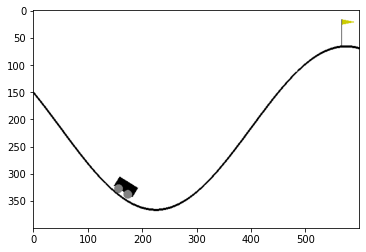

Q-value of the current state left=-48.81 nothing=-50.23 right=-51.52
Action: Left


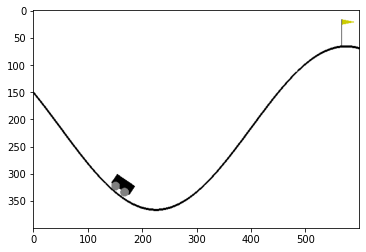

Q-value of the current state left=-48.44 nothing=-49.88 right=-51.17
Action: Left


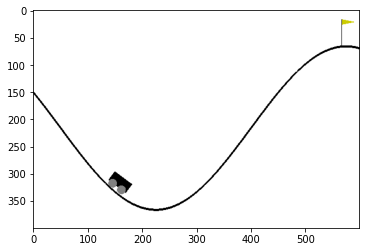

Q-value of the current state left=-48.22 nothing=-49.69 right=-50.99
Action: Left


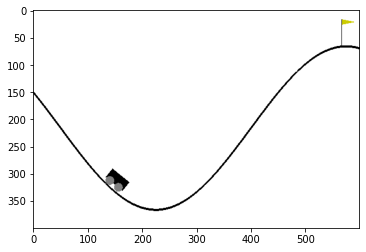

Q-value of the current state left=-48.14 nothing=-49.67 right=-51.00
Action: Left


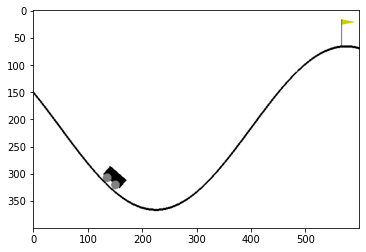

Q-value of the current state left=-48.08 nothing=-49.66 right=-51.02
Action: Left


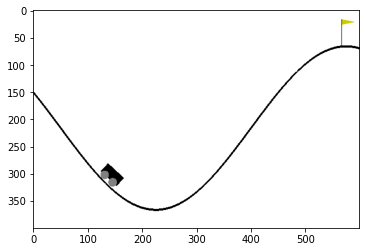

Q-value of the current state left=-47.99 nothing=-49.52 right=-50.90
Action: Left


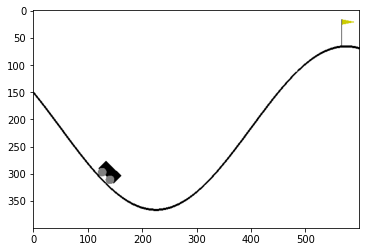

Q-value of the current state left=-48.05 nothing=-49.53 right=-50.94
Action: Left


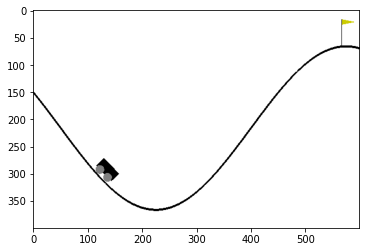

Q-value of the current state left=-48.98 nothing=-50.42 right=-51.88
Action: Left


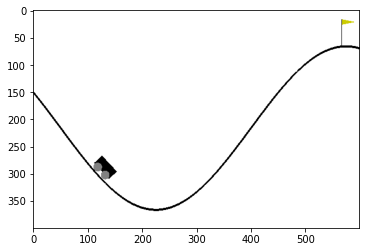

Q-value of the current state left=-48.98 nothing=-50.11 right=-51.31
Action: Left


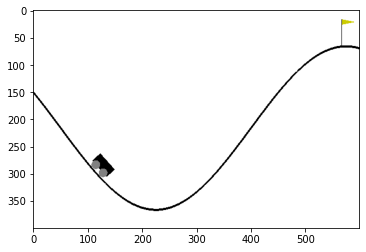

Q-value of the current state left=-47.69 nothing=-47.93 right=-48.26
Action: Left


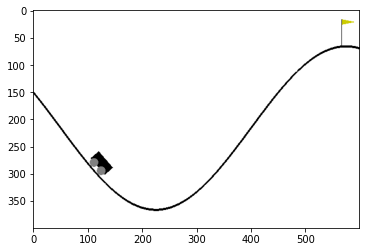

Q-value of the current state left=-47.29 nothing=-47.29 right=-47.36
Action: Nothing


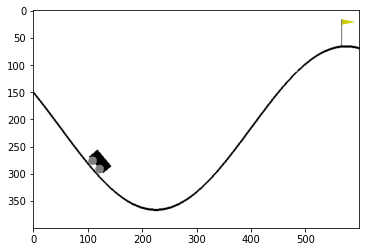

Q-value of the current state left=-47.42 nothing=-47.45 right=-47.49
Action: Left


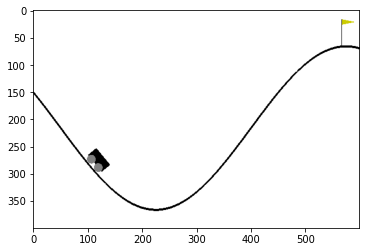

Q-value of the current state left=-46.93 nothing=-47.04 right=-47.05
Action: Left


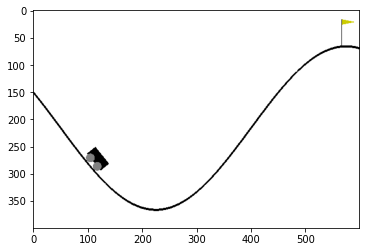

Q-value of the current state left=-46.48 nothing=-46.65 right=-46.64
Action: Left


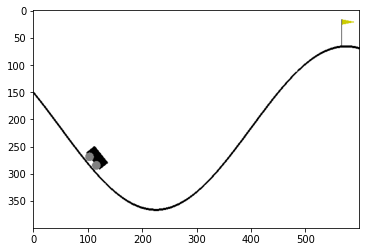

Q-value of the current state left=-46.15 nothing=-46.32 right=-46.28
Action: Left


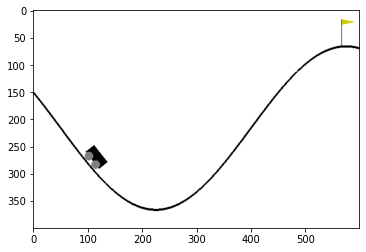

Q-value of the current state left=-46.20 nothing=-46.38 right=-46.28
Action: Left


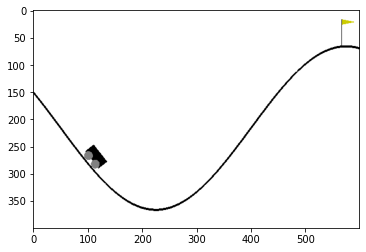

Q-value of the current state left=-46.04 nothing=-46.22 right=-46.07
Action: Left


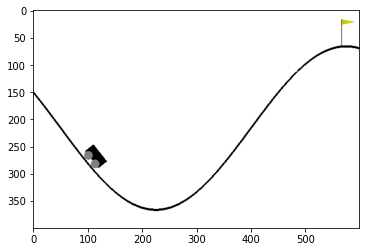

Q-value of the current state left=-45.58 nothing=-45.72 right=-45.56
Action: Right


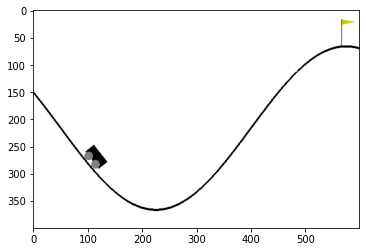

Q-value of the current state left=-45.05 nothing=-45.07 right=-44.91
Action: Right


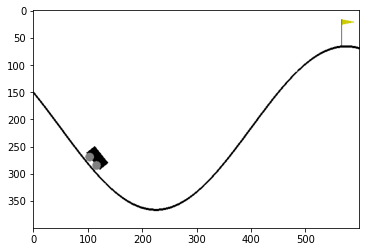

Q-value of the current state left=-44.89 nothing=-44.82 right=-44.63
Action: Right


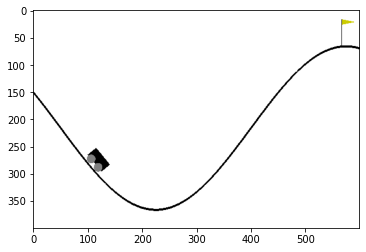

Q-value of the current state left=-44.62 nothing=-44.48 right=-44.26
Action: Right


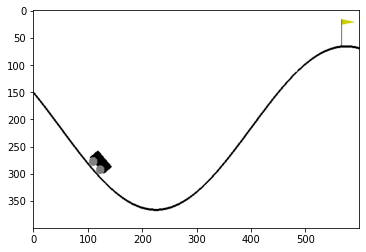

Q-value of the current state left=-44.50 nothing=-44.30 right=-44.05
Action: Right


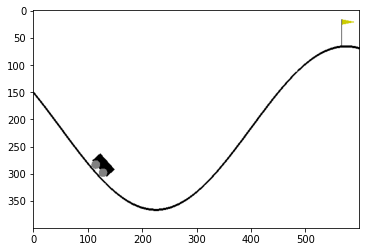

Q-value of the current state left=-44.55 nothing=-44.27 right=-43.98
Action: Right


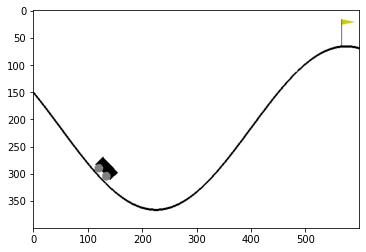

Q-value of the current state left=-44.66 nothing=-44.32 right=-43.98
Action: Right


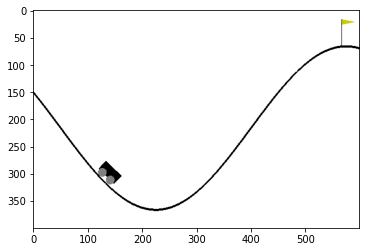

Q-value of the current state left=-44.74 nothing=-44.34 right=-43.98
Action: Right


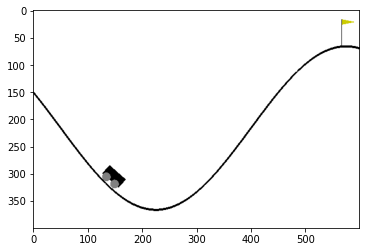

Q-value of the current state left=-45.01 nothing=-44.55 right=-44.15
Action: Right


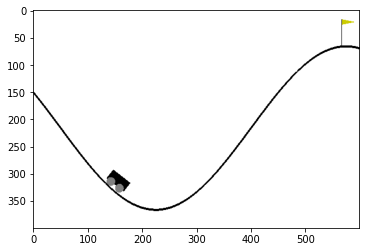

Q-value of the current state left=-44.76 nothing=-44.23 right=-43.78
Action: Right


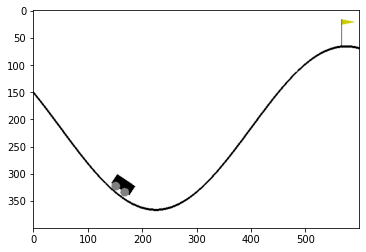

Q-value of the current state left=-44.49 nothing=-43.90 right=-43.39
Action: Right


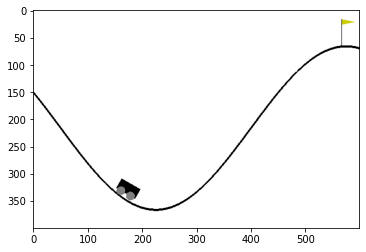

Q-value of the current state left=-44.66 nothing=-43.96 right=-43.37
Action: Right


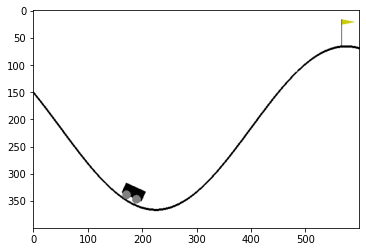

Q-value of the current state left=-45.22 nothing=-44.39 right=-43.67
Action: Right


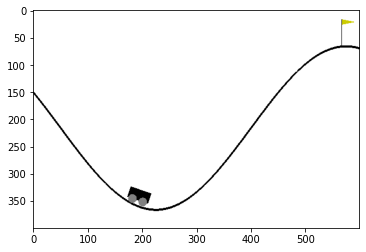

Q-value of the current state left=-45.75 nothing=-44.80 right=-43.96
Action: Right


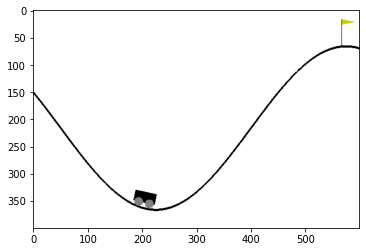

Q-value of the current state left=-46.16 nothing=-45.10 right=-44.13
Action: Right


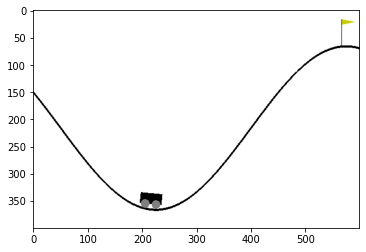

Q-value of the current state left=-45.88 nothing=-44.77 right=-43.76
Action: Right


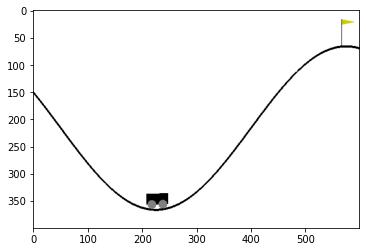

Q-value of the current state left=-45.98 nothing=-44.80 right=-43.72
Action: Right


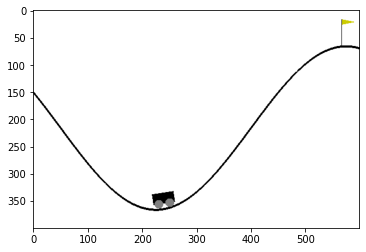

Q-value of the current state left=-46.08 nothing=-44.84 right=-43.68
Action: Right


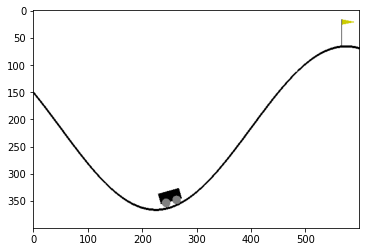

Q-value of the current state left=-45.83 nothing=-44.47 right=-43.28
Action: Right


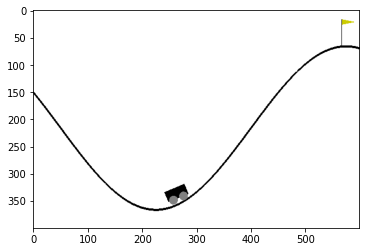

Q-value of the current state left=-46.23 nothing=-45.02 right=-43.65
Action: Right


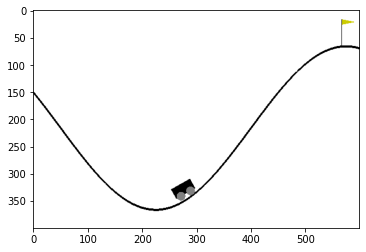

Q-value of the current state left=-46.11 nothing=-45.06 right=-43.59
Action: Right


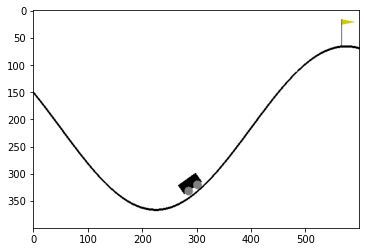

Q-value of the current state left=-45.35 nothing=-44.43 right=-42.99
Action: Right


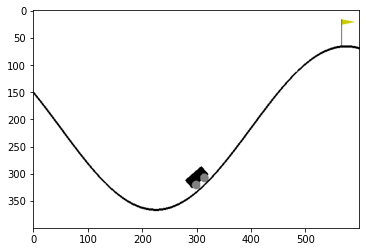

Q-value of the current state left=-44.80 nothing=-44.09 right=-42.85
Action: Right


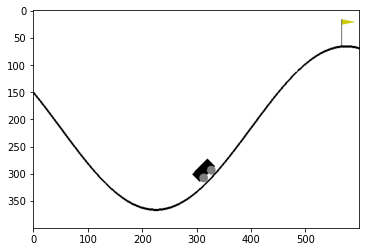

Q-value of the current state left=-44.67 nothing=-44.15 right=-43.05
Action: Right


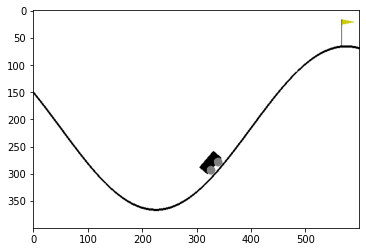

Q-value of the current state left=-44.40 nothing=-43.93 right=-42.90
Action: Right


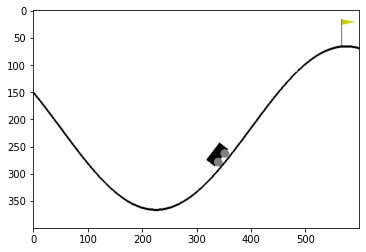

Q-value of the current state left=-43.97 nothing=-43.49 right=-42.52
Action: Right


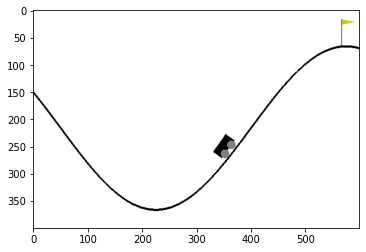

Q-value of the current state left=-44.01 nothing=-43.53 right=-42.59
Action: Right


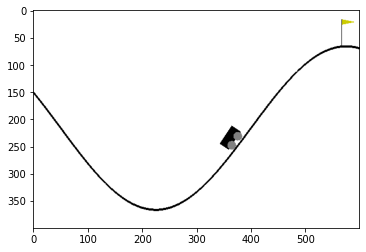

Q-value of the current state left=-43.90 nothing=-43.41 right=-42.50
Action: Right


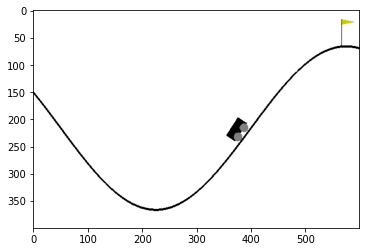

Q-value of the current state left=-43.21 nothing=-42.68 right=-41.79
Action: Right


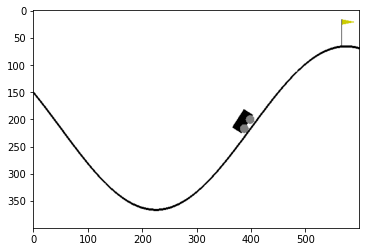

Q-value of the current state left=-42.67 nothing=-42.13 right=-41.25
Action: Right


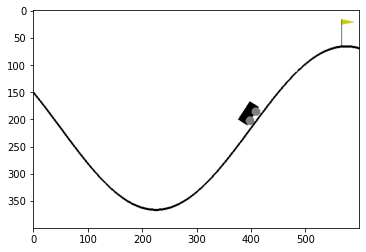

Q-value of the current state left=-42.23 nothing=-41.69 right=-40.84
Action: Right


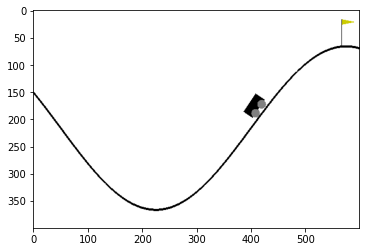

Q-value of the current state left=-41.89 nothing=-41.34 right=-40.51
Action: Right


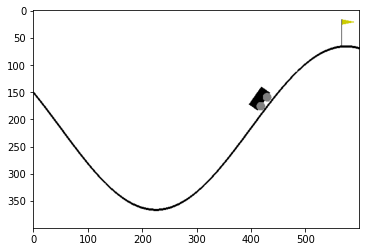

Q-value of the current state left=-41.61 nothing=-41.06 right=-40.26
Action: Right


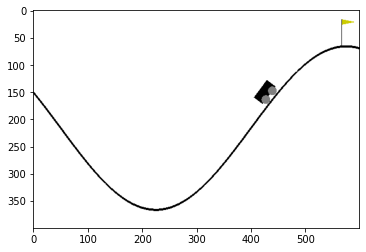

Q-value of the current state left=-41.34 nothing=-40.81 right=-40.04
Action: Right


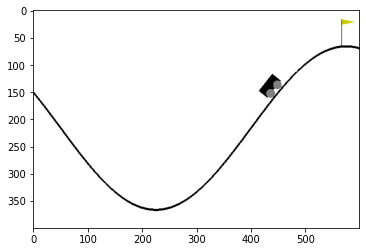

Q-value of the current state left=-41.05 nothing=-40.53 right=-39.79
Action: Right


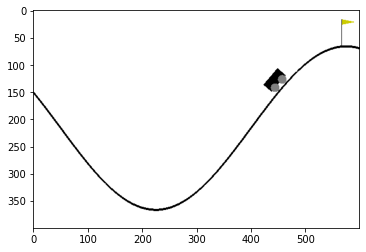

Q-value of the current state left=-42.37 nothing=-41.93 right=-41.15
Action: Right


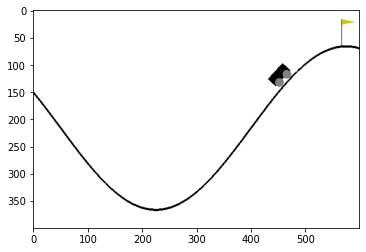

Q-value of the current state left=-42.84 nothing=-42.39 right=-41.60
Action: Right


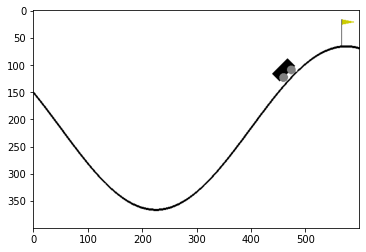

Q-value of the current state left=-41.76 nothing=-41.21 right=-40.46
Action: Right


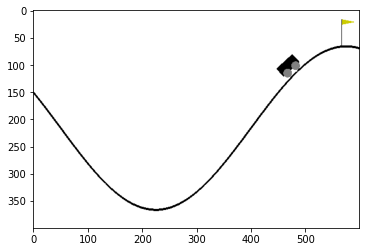

Q-value of the current state left=-40.70 nothing=-40.04 right=-39.33
Action: Right


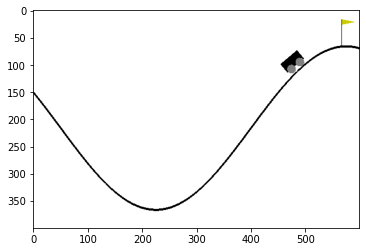

Q-value of the current state left=-39.62 nothing=-38.87 right=-38.19
Action: Right


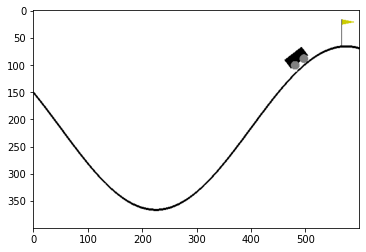

Q-value of the current state left=-38.53 nothing=-37.68 right=-37.03
Action: Right


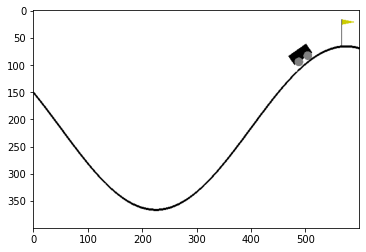

Q-value of the current state left=-37.42 nothing=-36.47 right=-35.84
Action: Right


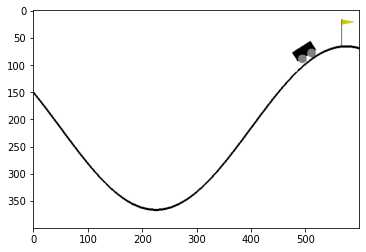

Q-value of the current state left=-36.26 nothing=-35.22 right=-34.60
Action: Right


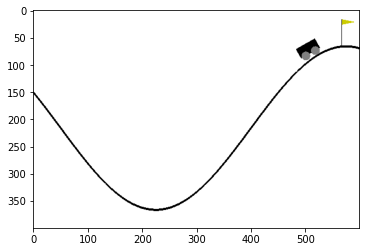

Q-value of the current state left=-35.13 nothing=-34.02 right=-33.41
Action: Right


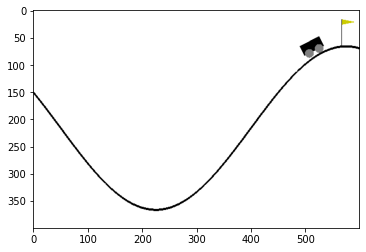

Q-value of the current state left=-34.15 nothing=-33.03 right=-32.38
Action: Right


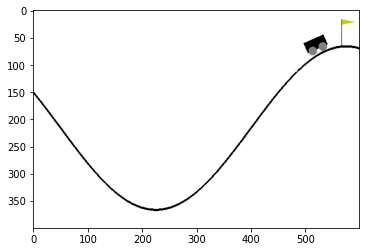

Q-value of the current state left=-33.08 nothing=-31.95 right=-31.24
Action: Right


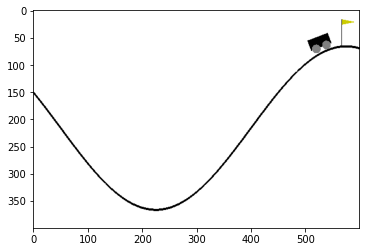

Q-value of the current state left=-31.91 nothing=-30.75 right=-30.00
Action: Right


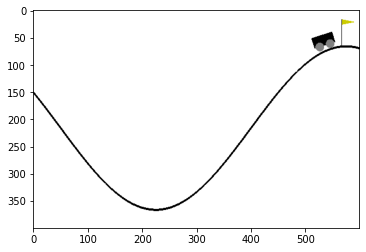

Q-value of the current state left=-30.62 nothing=-29.43 right=-28.63
Action: Right


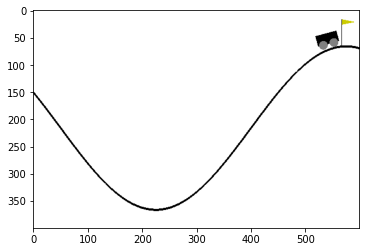

Q-value of the current state left=-29.24 nothing=-28.00 right=-27.15
Action: Right


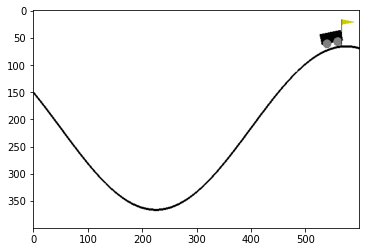

Q-value of the current state left=-27.71 nothing=-26.43 right=-25.52
Action: Right


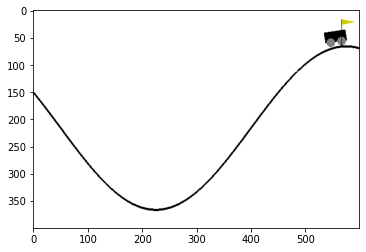

Q-value of the current state left=-26.04 nothing=-24.69 right=-23.72
Action: Right


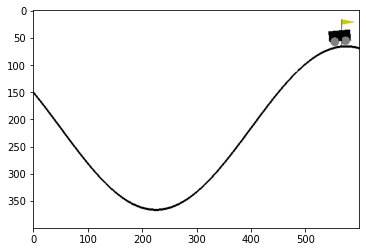

Q-value of the current state left=-24.26 nothing=-22.84 right=-21.81
Action: Right


In [20]:
episode_rewards = []
done = False
i = 0

while not done:
    i += 1

    # Display current state
    plt.imshow(train_env.render(mode="rgb_array"))
    plt.show()

    # Retrieve q-value
    q_values = get_q_values(dqn_vanilla, obs)

    # Take greedy-action
    action, _ = dqn_vanilla.predict(obs, deterministic=True)

    print(f"Q-value of the current state left={q_values[0]:.2f} nothing={q_values[1]:.2f} right={q_values[2]:.2f}")
    print(f"Action: {action_str[action]}")

    obs, reward, done, info = train_env.step(action)

    episode_rewards.append(reward)


**Exercise (3 minutes) - compare estimated initial q-value with actual discounted return**

Compute the discounted return (sum of discounted reward) of the episode and compare it to the initial estimated q-value.

Note: You will need to use the discount factor dqn_model.gamma

In [21]:
sum_discounted_rewards = 0

### YOUR CODE HERE
# Compute the sum of discounted reward for the last episode
# using `episode_rewards` list and `dqn_model.gamma` discount factor

count = 0
for reward in episode_rewards:
  reward = reward * (dqn_vanilla.gamma**count)
  sum_discounted_rewards = sum_discounted_rewards + reward
  count = count + 1

### END OF YOUR CODE

print(f"Sum discounted rewards: {sum_discounted_rewards:.2f}, initial q-value {initial_q_value:.2f}")

Sum discounted rewards: -59.53, initial q-value -60.82


## Exercise (30 minutes): Double DQN

In DQN, the same network is responsible for selecting and estimating the best next action (in the TD-target) and that may lead to over-estimation (the action which q-value is over-estimated will be chosen more often and this slow down training).

To reduce over-estimation, double q-learning (and then double DQN) was proposed. It decouples the action selection from the value estimation.

Concretely, in DQN, the target q-value is defined as:

$$Y^{DQN}_{t} = r_{t+1} + \gamma{Q}\left(s_{t+1}, \arg\max_{a}Q\left(s_{t+1}, a; \mathbb{\theta}_{target}\right); \mathbb{\theta}_{target}\right)$$

where the target network `q_net_target` with parameters $\mathbb{\theta}_{target}$ is used for both action selection and estimation, and can therefore be rewritten:

$$Y^{DQN}_{t} = r_{t+1} + \gamma \max_{a}{Q}\left(s_{t+1}, a; \mathbb{\theta}_{target}\right)$$

Double DQN uses the online network `q_net` with parameters $\mathbb{\theta}_{online}$ to select the action and the target network `q_net_target` to estimate the associated q-values:

$$Y^{DoubleDQN}_{t} = r_{t+1} + \gamma{Q}\left(s_{t+1}, \arg\max_{a}Q\left(s_{t+1}, a; \mathbb{\theta}_{online}\right); \mathbb{\theta}_{target}\right)$$


The goal in this exercise is for you to write the update method for `DoubleDQN`.

You will need to:

1. Sample replay buffer data using `self.replay_buffer.sample(batch_size)`

2. Compute the Double DQN target q-value using the next observations `replay_data.next_observation`, the online network `self.q_net`, the target network `self.q_net_target`, the rewards `replay_data.rewards` and the termination signals `replay_data.dones`. Be careful with the shape of each object ;)

3. Compute the current q-value estimates using the online network `self.q_net`, the current observations `replay_data.observations` and the buffer actions `replay_data.actions`

4. Compute the loss to train the q-network using L2 or Huber loss (`F.smooth_l1_loss`)


Link: https://paperswithcode.com/method/double-q-learning

Paper: https://arxiv.org/abs/1509.06461



In [22]:
from torch.nn import functional as F

class DoubleDQN(DQN):
    def train(self, gradient_steps: int, batch_size: int = 100) -> None:
        # Switch to train mode (this affects batch norm / dropout)
        self.policy.set_training_mode(True)
        # Update learning rate according to schedule
        self._update_learning_rate(self.policy.optimizer)

        losses = []
        for _ in range(gradient_steps):
            ### YOUR CODE HERE
            # Sample replay buffer
            replay_data = self.replay_buffer.sample(batch_size)

            # Do not backpropagate gradient to the target network
            with th.no_grad():
                # Compute the next Q-values using the target network
                next_q_values = self.q_net_target(replay_data.next_observations)
                # Decouple action selection from value estimation
                # Compute q-values for the next observation using the online q net
                next_q_values_online = self.q_net(replay_data.next_observations)
                # Select action with online network
                next_actions_online = th.argmax(next_q_values_online, dim=1)
                # Estimate the q-values for the selected actions using target q network
                next_q_values = th.gather(next_q_values, dim=1, index=next_actions_online.unsqueeze(-1))
               
                # 1-step TD target
                target_q_values = replay_data.rewards + (1 - replay_data.dones) * self.gamma * next_q_values

            # Get current Q-values estimates
            current_q_values = self.q_net(replay_data.observations)


            # Retrieve the q-values for the actions from the replay buffer
            current_q_values = th.gather(current_q_values, dim=1, index=replay_data.actions.long())

            # Check the shape
            assert current_q_values.shape == target_q_values.shape

            # Compute loss (L2 or Huber loss)
            loss = F.huber_loss(target_q_values, current_q_values)

            ### END OF YOUR CODE
            
            losses.append(loss.item())

            # Optimize the q-network
            self.policy.optimizer.zero_grad()
            loss.backward()
            # Clip gradient norm
            th.nn.utils.clip_grad_norm_(self.policy.parameters(), self.max_grad_norm)
            self.policy.optimizer.step()

        # Increase update counter
        self._n_updates += gradient_steps

        self.logger.record("train/n_updates", self._n_updates, exclude="tensorboard")
        self.logger.record("train/loss", np.mean(losses))

## Monitoring Evolution of the Estimated q-value


Here we create a SB3 callback to over-estimate initial q-values and then monitor their evolution over time.

In [23]:
from torch.nn import functional as F

from stable_baselines3.common.callbacks import BaseCallback


class MonitorQValueCallback(BaseCallback):
    """
    Callback to monitor the evolution of the q-value
    for the initial state.
    It allows to artificially over-estimate a q-value for initial states.

    """
    def __init__(self, sample_interval: int = 2500):
        super().__init__()
        self.timesteps = []
        self.max_q_values = []
        self.sample_interval = sample_interval
        n_samples = 512
        env = gym.make("MountainCar-v0")
        # Sample initial states that will be used to monitor the estimated q-value
        self.start_obs = np.array([env.reset() for _ in range(n_samples)])
    
    def _on_training_start(self) -> None:
        # Create overestimation
        obs = th.tensor(self.start_obs, device=self.model.device).float()
        # Over-estimate going left q-value for the initial states
        target_q_values = th.ones((len(obs), 1), device=self.model.device).float() * 100

        for _ in range(100):
            # Get current Q-values estimates
            current_q_values = self.model.q_net(obs)

            # Over-estimate going left
            current_q_values = th.gather(current_q_values, dim=1, index=th.zeros((len(obs), 1), device=self.model.device).long())

            loss = F.mse_loss(current_q_values, target_q_values)

            # Optimize the policy
            self.model.policy.optimizer.zero_grad()
            loss.backward()
            self.model.policy.optimizer.step()

    def _on_step(self) -> bool:
        # Sample q-values
        if self.n_calls % self.sample_interval == 0:
            # Monitor estimated q-values using current model
            obs = th.tensor(self.start_obs, device=self.model.device).float()
            with th.no_grad():
                q_values = self.model.q_net(obs).cpu().numpy()

            self.logger.record("train/max_q_value", float(q_values.max()))
            self.timesteps.append(self.num_timesteps)
            self.max_q_values.append(q_values.max())
        return True

## Evolution of the q-value with initial over-estimation


### DQN

In [24]:
dqn_model = DQN("MlpPolicy",
            "MountainCar-v0",
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=5000,
            learning_starts=1000,
            buffer_size=25000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
            tensorboard_log=tensorboard_log,
            seed=102)

Using cpu device
Creating environment from the given name 'MountainCar-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Define the callback

In [25]:
monitor_dqn_value_cb = MonitorQValueCallback()

In [26]:
dqn_model.learn(total_timesteps=int(4e4), callback=monitor_dqn_value_cb)

Logging to data/tb/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.907    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1072     |
|    time_elapsed     | 0        |
|    total_timesteps  | 800      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.814    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 747      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1600     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.00014  |
|    n_updates        | 296      |
----------------------------------
----------------------------------
| rollout/            |       

### Double DQN

In [27]:
double_q = DoubleDQN("MlpPolicy",
            "MountainCar-v0",
            verbose=1,
            train_freq=16,
            gradient_steps=8,
            gamma=0.99,
            exploration_fraction=0.2,
            exploration_final_eps=0.07,
            target_update_interval=5000,
            learning_starts=1000,
            buffer_size=25000,
            batch_size=128,
            learning_rate=4e-3,
            policy_kwargs=dict(net_arch=[256, 256]),
            tensorboard_log=tensorboard_log,
            seed=102)

Using cpu device
Creating environment from the given name 'MountainCar-v0'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [30]:
monitor_double_q_value_cb = MonitorQValueCallback()

In [31]:
double_q.learn(int(4e4), log_interval=10, callback=monitor_double_q_value_cb)

Logging to data/tb/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.767    |
| time/               |          |
|    episodes         | 10       |
|    fps              | 554      |
|    time_elapsed     | 3        |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.164    |
|    n_updates        | 496      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.535    |
| time/               |          |
|    episodes         | 20       |
|    fps              | 239      |
|    time_elapsed     | 16       |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.004    |
|    loss             | 0.174 

### Evolution of the max q-value for start states over time

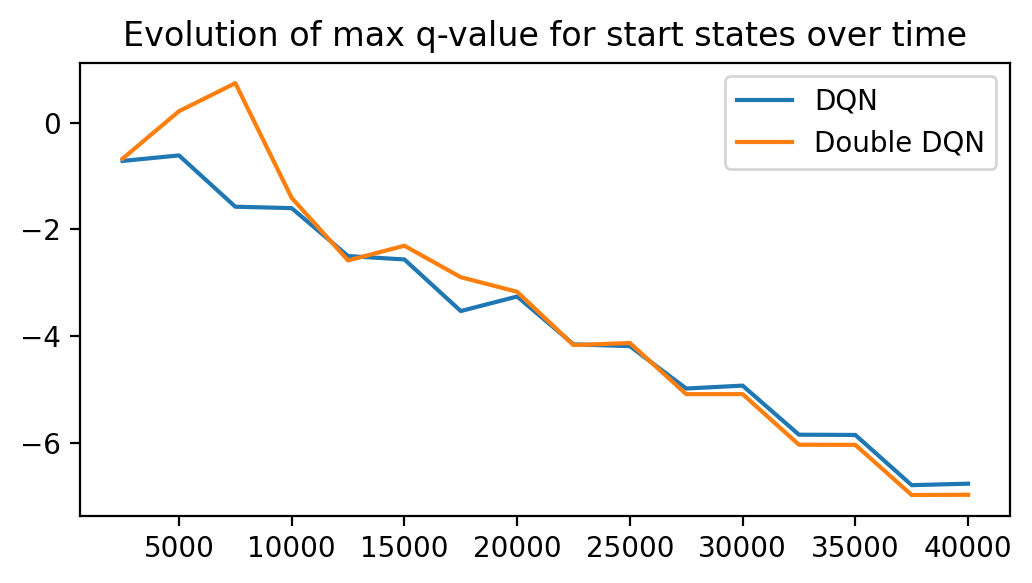

In [32]:
plt.figure(figsize=(6, 3), dpi=200)
plt.title("Evolution of max q-value for start states over time")
plt.plot(monitor_dqn_value_cb.timesteps, monitor_dqn_value_cb.max_q_values, label="DQN")
plt.plot(monitor_double_q_value_cb.timesteps, monitor_double_q_value_cb.max_q_values, label="Double DQN")
plt.legend()